# Contents

1. Micro_credit_loan
2. Problem Definition
3. Data Analysis (EDA)
4. Pre-processing Pipeline
5. Building Machine Learning Models
6. Conclusion

# 1. Micro_credit_loan

A Microfinance Institution (MFI) is an organization that offers financial services to low income populations. MFS becomes very useful when targeting especially the unbanked poor families living in remote areas with not much sources of income. The Microfinance services (MFS) provided by MFI are Group Loans, Agricultural Loans, Individual Business Loans and so on. 
Many microfinance institutions (MFI), experts and donors are supporting the idea of using mobile financial services (MFS) which they feel are more convenient and efficient, and cost saving, than the traditional high-touch model used since long for the purpose of delivering microfinance services. Though, the MFI industry is primarily focusing on low income families and are very useful in such areas, the implementation of MFS has been uneven with both significant challenges and successes.
Today, microfinance is widely accepted as a poverty-reduction tool, representing $70 billion in outstanding loans and a global outreach of 200 million clients.
an MFI to provide micro-credit on mobile balances to be paid back in 5 days. The Consumer is believed to be defaulter if he deviates from the path of paying back the loaned amount within the time duration of 5 days. For the loan amount of 5 (in Indonesian Rupiah), payback amount should be 6 (in Indonesian Rupiah), while, for the loan amount of 10 (in Indonesian Rupiah), the payback amount should be 12 (in Indonesian Rupiah). 
The sample data is provided to us from our client database. It is hereby given to you for this exercise. In order to improve the selection of customers for the credit, the client wants some predictions that could help them in further investment and improvement in selection of customers. 


# 2. Problem Definition

We need to build a model to classify label '0' as defaulter and '1' as non-defaulter

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('micro_credit_project.csv')

In [3]:
df

,Unnamed: 0,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,...,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate
0,1,0,21408I70789,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,...,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,UPW,20-07-2016
1,2,1,76462I70374,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,...,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,UPW,10-08-2016
2,3,1,17943I70372,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,...,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,UPW,19-08-2016
3,4,1,55773I70781,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,...,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,UPW,06-06-2016
4,5,1,03813I82730,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,...,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,UPW,22-06-2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209588,209589,1,22758I85348,404.0,151.872333,151.872333,1089.19,1089.19,1.0,0.0,...,6.0,0.0,2.0,12,6,0.0,1.000000,1.000000,UPW,17-06-2016
209589,209590,1,95583I84455,1075.0,36.936000,36.936000,1728.36,1728.36,4.0,0.0,...,6.0,0.0,3.0,18,6,0.0,1.000000,1.000000,UPW,12-06-2016
209590,209591,1,28556I85350,1013.0,11843.111670,11904.350000,5861.83,8893.20,3.0,0.0,...,12.0,0.0,6.0,54,12,0.0,4.000000,3.833333,UPW,29-07-2016
209591,209592,1,59712I82733,1732.0,12488.228330,12574.370000,411.83,984.58,2.0,38.0,...,12.0,0.0,3.0,24,12,0.0,0.000000,10.500000,UPW,25-07-2016


# 3.Data Analysis (EDA)

In [4]:
df.columns

Index(['Unnamed: 0', 'label', 'msisdn', 'aon', 'daily_decr30', 'daily_decr90',
       'rental30', 'rental90', 'last_rech_date_ma', 'last_rech_date_da',
       'last_rech_amt_ma', 'cnt_ma_rech30', 'fr_ma_rech30',
       'sumamnt_ma_rech30', 'medianamnt_ma_rech30', 'medianmarechprebal30',
       'cnt_ma_rech90', 'fr_ma_rech90', 'sumamnt_ma_rech90',
       'medianamnt_ma_rech90', 'medianmarechprebal90', 'cnt_da_rech30',
       'fr_da_rech30', 'cnt_da_rech90', 'fr_da_rech90', 'cnt_loans30',
       'amnt_loans30', 'maxamnt_loans30', 'medianamnt_loans30', 'cnt_loans90',
       'amnt_loans90', 'maxamnt_loans90', 'medianamnt_loans90', 'payback30',
       'payback90', 'pcircle', 'pdate'],
      dtype='object')

In [5]:
df.pcircle.value_counts()

UPW    209593
Name: pcircle, dtype: int64

In [6]:
df.shape

(209593, 37)

In [7]:
df.dtypes

Unnamed: 0                int64
label                     int64
msisdn                   object
aon                     float64
daily_decr30            float64
daily_decr90            float64
rental30                float64
rental90                float64
last_rech_date_ma       float64
last_rech_date_da       float64
last_rech_amt_ma          int64
cnt_ma_rech30             int64
fr_ma_rech30            float64
sumamnt_ma_rech30       float64
medianamnt_ma_rech30    float64
medianmarechprebal30    float64
cnt_ma_rech90             int64
fr_ma_rech90              int64
sumamnt_ma_rech90         int64
medianamnt_ma_rech90    float64
medianmarechprebal90    float64
cnt_da_rech30           float64
fr_da_rech30            float64
cnt_da_rech90             int64
fr_da_rech90              int64
cnt_loans30               int64
amnt_loans30              int64
maxamnt_loans30         float64
medianamnt_loans30      float64
cnt_loans90             float64
amnt_loans90              int64
maxamnt_

In [8]:
df.isnull().sum()

Unnamed: 0              0
label                   0
msisdn                  0
aon                     0
daily_decr30            0
daily_decr90            0
rental30                0
rental90                0
last_rech_date_ma       0
last_rech_date_da       0
last_rech_amt_ma        0
cnt_ma_rech30           0
fr_ma_rech30            0
sumamnt_ma_rech30       0
medianamnt_ma_rech30    0
medianmarechprebal30    0
cnt_ma_rech90           0
fr_ma_rech90            0
sumamnt_ma_rech90       0
medianamnt_ma_rech90    0
medianmarechprebal90    0
cnt_da_rech30           0
fr_da_rech30            0
cnt_da_rech90           0
fr_da_rech90            0
cnt_loans30             0
amnt_loans30            0
maxamnt_loans30         0
medianamnt_loans30      0
cnt_loans90             0
amnt_loans90            0
maxamnt_loans90         0
medianamnt_loans90      0
payback30               0
payback90               0
pcircle                 0
pdate                   0
dtype: int64

* No null values are present.

In [9]:
df.pdate.value_counts()

04-07-2016    3150
05-07-2016    3127
07-07-2016    3116
20-06-2016    3099
17-06-2016    3082
              ... 
04-06-2016    1559
18-08-2016    1407
19-08-2016    1132
20-08-2016     788
21-08-2016     324
Name: pdate, Length: 82, dtype: int64

# Observation:

* Columns 'Unnamed: 0', 'msisdn', 'pcirlce', and 'pdate' are not giving any useful information, hence dropping these columns.

In [10]:
df.drop(['Unnamed: 0','msisdn','pcircle','pdate'],axis=1,inplace=True)

In [11]:
df.shape

(209593, 33)

In [12]:
df.dtypes

label                     int64
aon                     float64
daily_decr30            float64
daily_decr90            float64
rental30                float64
rental90                float64
last_rech_date_ma       float64
last_rech_date_da       float64
last_rech_amt_ma          int64
cnt_ma_rech30             int64
fr_ma_rech30            float64
sumamnt_ma_rech30       float64
medianamnt_ma_rech30    float64
medianmarechprebal30    float64
cnt_ma_rech90             int64
fr_ma_rech90              int64
sumamnt_ma_rech90         int64
medianamnt_ma_rech90    float64
medianmarechprebal90    float64
cnt_da_rech30           float64
fr_da_rech30            float64
cnt_da_rech90             int64
fr_da_rech90              int64
cnt_loans30               int64
amnt_loans30              int64
maxamnt_loans30         float64
medianamnt_loans30      float64
cnt_loans90             float64
amnt_loans90              int64
maxamnt_loans90           int64
medianamnt_loans90      float64
payback3

* All values are continous now in our dataset.

# Univariate Analysis

* Lets first analyse our target variable.

In [13]:
df['label'].value_counts()

1    183431
0     26162
Name: label, dtype: int64

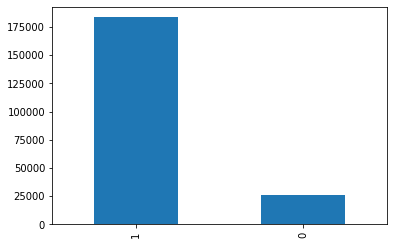

In [14]:
df['label'].value_counts().plot.bar()

In [15]:
df['label'].value_counts()/len(df['label'])

1    0.875177
0    0.124823
Name: label, dtype: float64

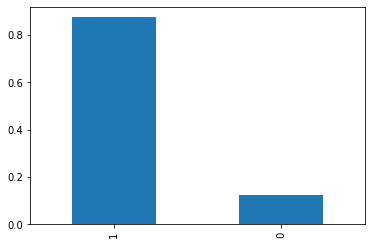

In [16]:
(df['label'].value_counts()/len(df['label'])).plot.bar()

In [17]:
df[df.columns[0:11]].describe()

,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30
count,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.00000,209593.000000,209593.000000,209593.000000,209593.000000
mean,0.875177,8112.343445,5381.402289,6082.515068,2692.581910,3483.406534,3755.84780,3712.202921,2064.452797,3.978057,3737.355121
std,0.330519,75696.082531,9220.623400,10918.812767,4308.586781,5770.461279,53905.89223,53374.833430,2370.786034,4.256090,53643.625172
min,0.000000,-48.000000,-93.012667,-93.012667,-23737.140000,-24720.580000,-29.00000,-29.000000,0.000000,0.000000,0.000000
25%,1.000000,246.000000,42.440000,42.692000,280.420000,300.260000,1.00000,0.000000,770.000000,1.000000,0.000000
50%,1.000000,527.000000,1469.175667,1500.000000,1083.570000,1334.000000,3.00000,0.000000,1539.000000,3.000000,2.000000
75%,1.000000,982.000000,7244.000000,7802.790000,3356.940000,4201.790000,7.00000,0.000000,2309.000000,5.000000,6.000000
max,1.000000,999860.755200,265926.000000,320630.000000,198926.110000,200148.110000,998650.37770,999171.809400,55000.000000,203.000000,999606.368100


In [18]:
df[df.columns[12:22]].describe()

,medianamnt_ma_rech30,medianmarechprebal30,cnt_ma_rech90,fr_ma_rech90,sumamnt_ma_rech90,medianamnt_ma_rech90,medianmarechprebal90,cnt_da_rech30,fr_da_rech30,cnt_da_rech90
count,209593.000000,209593.000000,209593.00000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000
mean,1812.817952,3851.927942,6.31543,7.716780,12396.218352,1864.595821,92.025541,262.578110,3749.494447,0.041495
std,2070.864620,54006.374433,7.19347,12.590251,16857.793882,2081.680664,369.215658,4183.897978,53885.414979,0.397556
min,0.000000,-200.000000,0.00000,0.000000,0.000000,0.000000,-200.000000,0.000000,0.000000,0.000000
25%,770.000000,11.000000,2.00000,0.000000,2317.000000,773.000000,14.600000,0.000000,0.000000,0.000000
50%,1539.000000,33.900000,4.00000,2.000000,7226.000000,1539.000000,36.000000,0.000000,0.000000,0.000000
75%,1924.000000,83.000000,8.00000,8.000000,16000.000000,1924.000000,79.310000,0.000000,0.000000,0.000000
max,55000.000000,999479.419300,336.00000,88.000000,953036.000000,55000.000000,41456.500000,99914.441420,999809.240100,38.000000


In [19]:
df[df.columns[22:33]].describe()

,fr_da_rech90,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90
count,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000
mean,0.045712,2.758981,17.952021,274.658747,0.054029,18.520919,23.645398,6.703134,0.046077,3.398826,4.321485
std,0.951386,2.554502,17.379741,4245.264648,0.218039,224.797423,26.469861,2.103864,0.200692,8.813729,10.308108
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,6.000000,6.000000,0.000000,1.000000,6.000000,6.000000,0.000000,0.000000,0.000000
50%,0.000000,2.000000,12.000000,6.000000,0.000000,2.000000,12.000000,6.000000,0.000000,0.000000,1.666667
75%,0.000000,4.000000,24.000000,6.000000,0.000000,5.000000,30.000000,6.000000,0.000000,3.750000,4.500000
max,64.000000,50.000000,306.000000,99864.560860,3.000000,4997.517944,438.000000,12.000000,3.000000,171.500000,171.500000


In [20]:

collist=df.columns.values
ncol=2
nrows=17

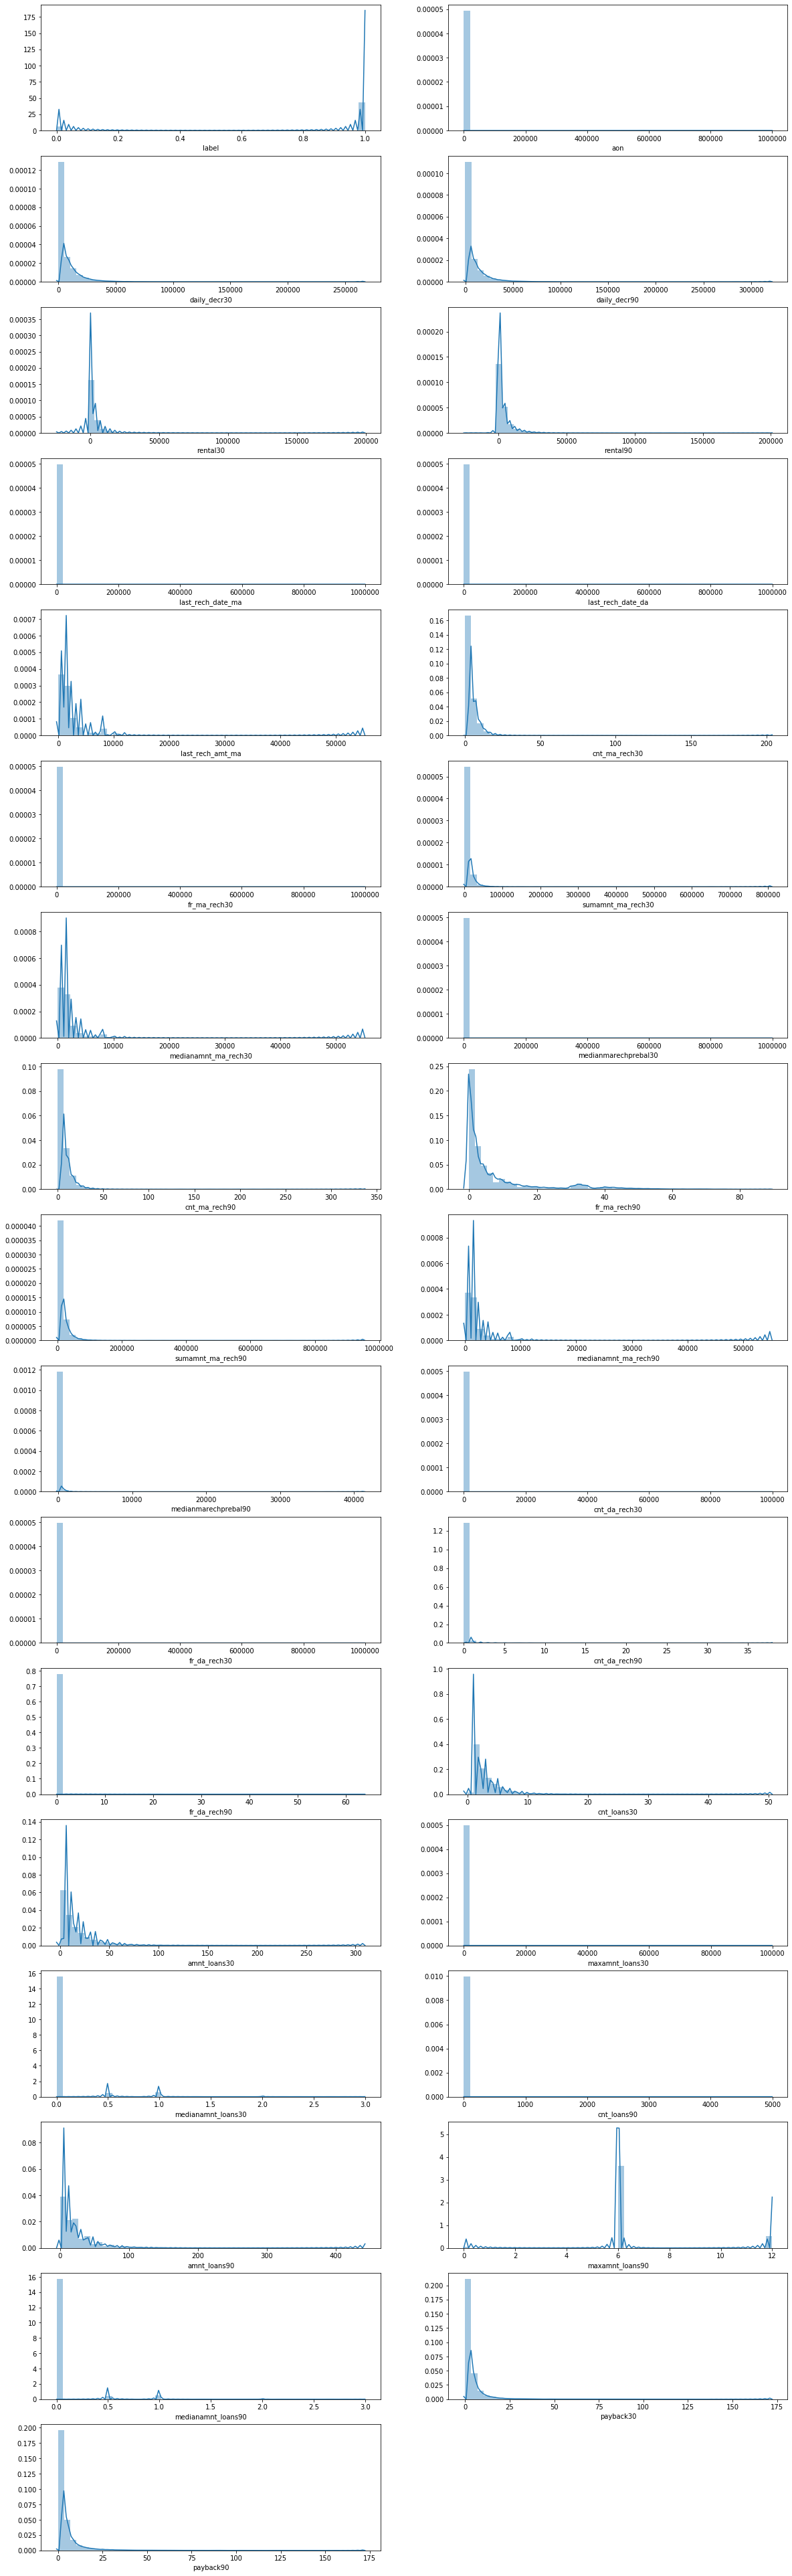

In [21]:
plt.figure(figsize=(20,70))
for i in range (0,len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.distplot(df[collist[i]])

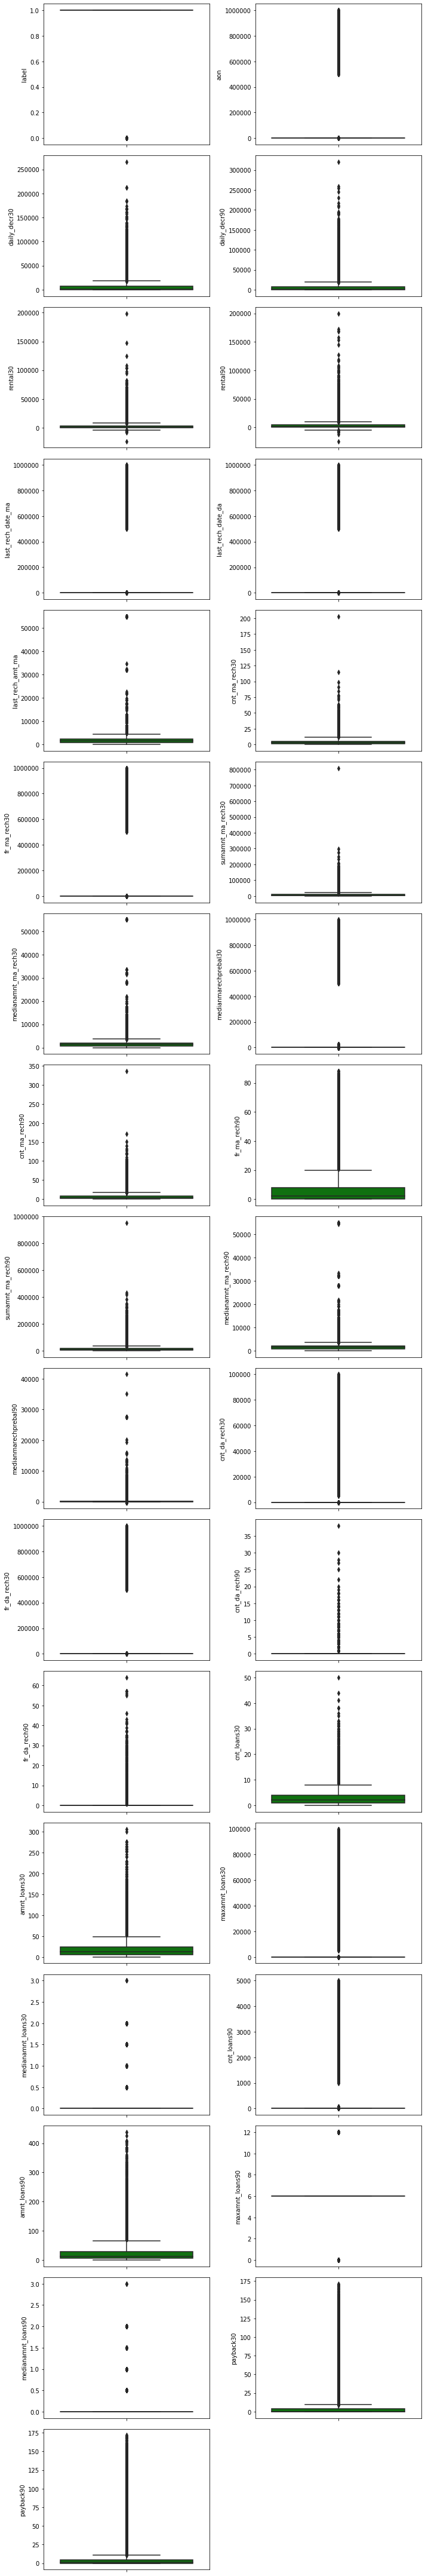

In [22]:
#Lets visualize outliers through boxplots
plt.figure(figsize=(10,60))
for i in range (0,len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.boxplot(df[collist[i]],color='green',orient='v')
    plt.tight_layout()

# Bivariate Analysis

In [23]:
#Lets check the correlation.
dfcor= df.corr()
dfcor

,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,...,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90
label,1.000000,-0.003785,0.168298,0.166150,0.058085,0.075521,0.003728,0.001711,0.131804,0.237331,...,0.196283,0.197272,0.000248,0.044589,0.004733,0.199788,0.084144,0.035747,0.048336,0.049183
aon,-0.003785,1.000000,0.001104,0.000374,-0.000960,-0.000790,0.001692,-0.001693,0.004256,-0.003148,...,-0.001826,-0.001726,-0.002764,0.004664,-0.000611,-0.002319,-0.001191,0.002771,0.001940,0.002203
daily_decr30,0.168298,0.001104,1.000000,0.977704,0.442066,0.458977,0.000487,-0.001636,0.275837,0.451385,...,0.366116,0.471492,-0.000028,-0.011610,0.008962,0.563496,0.400199,-0.037305,0.026915,0.047175
daily_decr90,0.166150,0.000374,0.977704,1.000000,0.434685,0.471730,0.000908,-0.001886,0.264131,0.426707,...,0.340387,0.447869,0.000025,-0.005591,0.009446,0.567204,0.397251,-0.034686,0.019400,0.040800
rental30,0.058085,-0.000960,0.442066,0.434685,1.000000,0.955237,-0.001095,0.003261,0.127271,0.233343,...,0.180203,0.233453,-0.000864,-0.016482,0.004012,0.298943,0.234211,-0.035489,0.072974,0.095147
rental90,0.075521,-0.000790,0.458977,0.471730,0.955237,1.000000,-0.001688,0.002794,0.121416,0.230260,...,0.171595,0.231906,-0.001411,-0.009467,0.005141,0.327436,0.251029,-0.034122,0.067110,0.099501
last_rech_date_ma,0.003728,0.001692,0.000487,0.000908,-0.001095,-0.001688,1.000000,0.001790,-0.000147,0.004311,...,0.001193,0.000903,0.000928,0.001835,-0.000225,0.000870,-0.001123,0.002771,-0.002233,-0.001583
last_rech_date_da,0.001711,-0.001693,-0.001636,-0.001886,0.003261,0.002794,0.001790,1.000000,-0.000149,0.001549,...,0.000380,0.000536,0.000503,0.000061,-0.000972,0.000519,0.001524,-0.002239,0.000077,0.000417
last_rech_amt_ma,0.131804,0.004256,0.275837,0.264131,0.127271,0.121416,-0.000147,-0.000149,1.000000,-0.002662,...,-0.027612,0.008502,0.001000,0.028370,0.000093,0.014067,0.148460,0.021004,-0.027369,-0.014260
cnt_ma_rech30,0.237331,-0.003148,0.451385,0.426707,0.233343,0.230260,0.004311,0.001549,-0.002662,1.000000,...,0.765802,0.752296,0.000109,-0.067011,0.014703,0.685257,0.174104,-0.071451,0.043617,0.017362


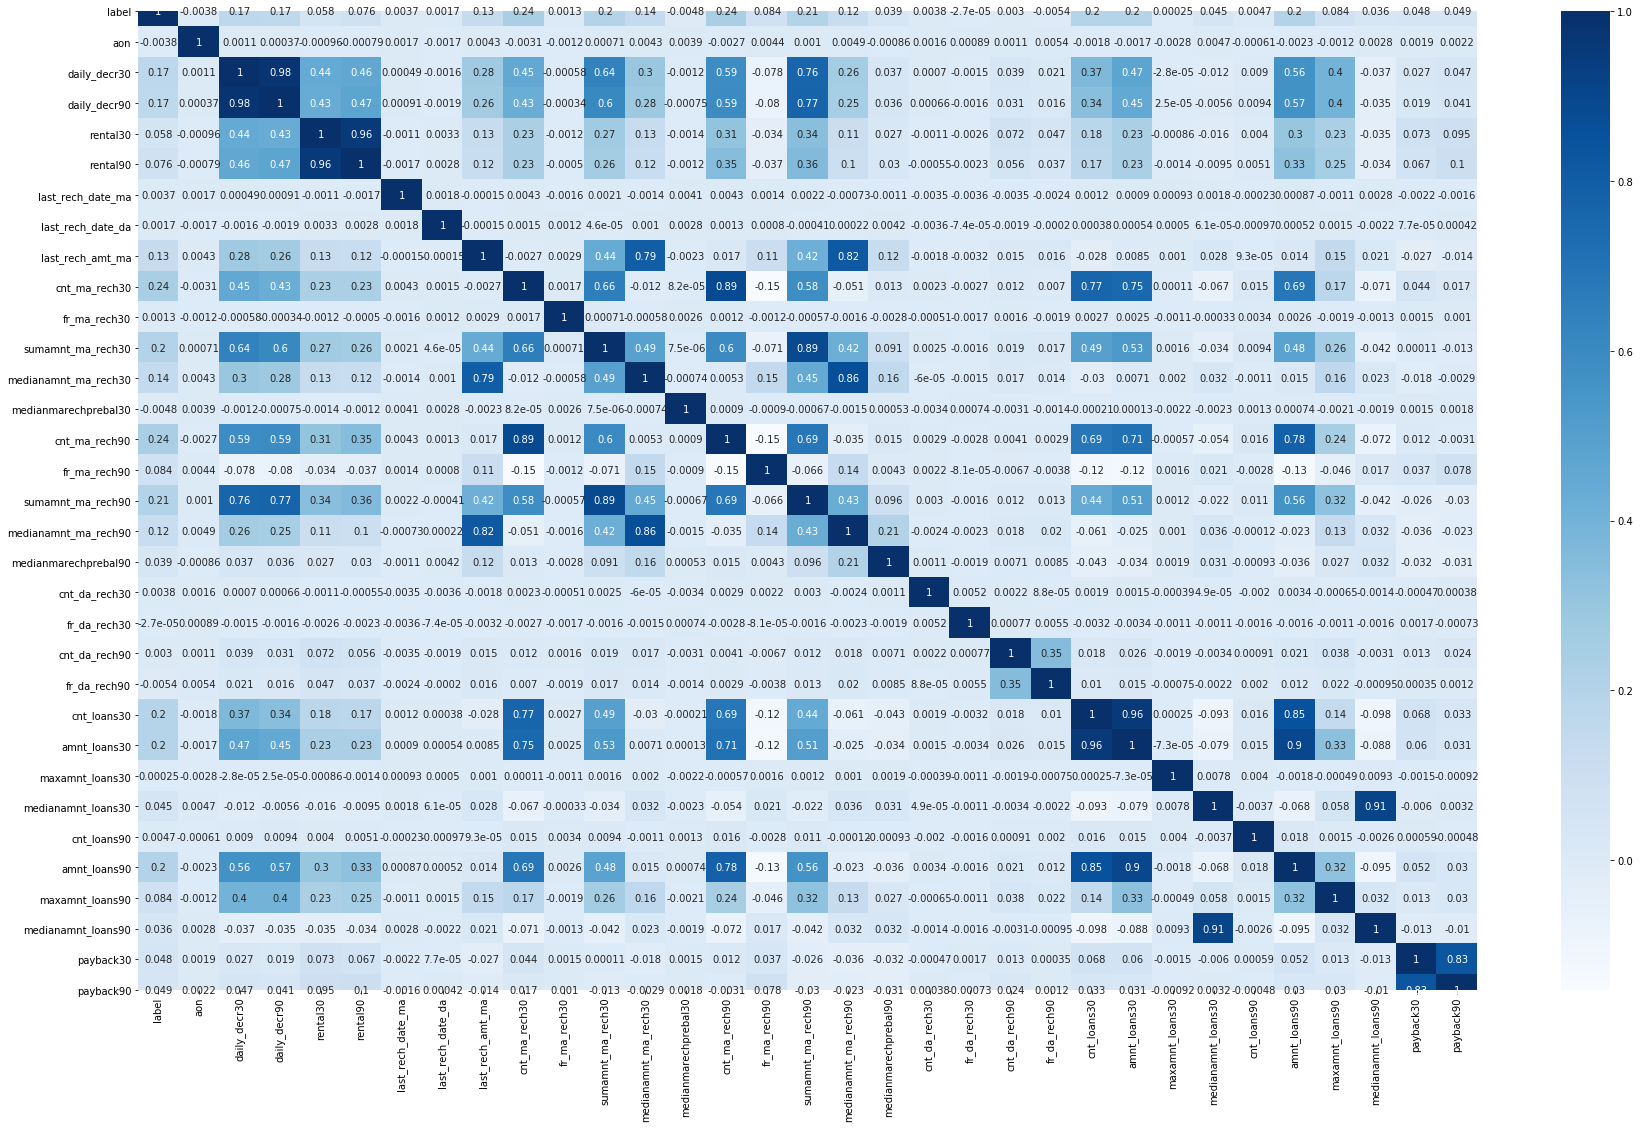

In [24]:
plt.figure(figsize = (30,18))
sns.heatmap(dfcor,cmap = 'Blues',annot = True)

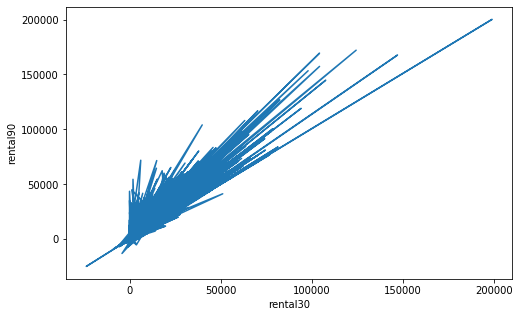

In [25]:
plt.figure(figsize=(8,5))
x=df['rental30']
y=df['rental90']
plt.xlabel('rental30')
plt.ylabel('rental90')
plt.plot(x,y)

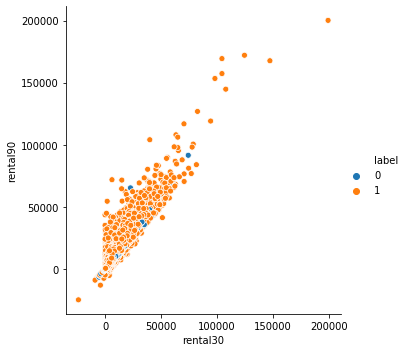

In [26]:
sns.relplot(x="rental30", y="rental90", hue="label", data=df);


In [27]:
df.columns

Index(['label', 'aon', 'daily_decr30', 'daily_decr90', 'rental30', 'rental90',
       'last_rech_date_ma', 'last_rech_date_da', 'last_rech_amt_ma',
       'cnt_ma_rech30', 'fr_ma_rech30', 'sumamnt_ma_rech30',
       'medianamnt_ma_rech30', 'medianmarechprebal30', 'cnt_ma_rech90',
       'fr_ma_rech90', 'sumamnt_ma_rech90', 'medianamnt_ma_rech90',
       'medianmarechprebal90', 'cnt_da_rech30', 'fr_da_rech30',
       'cnt_da_rech90', 'fr_da_rech90', 'cnt_loans30', 'amnt_loans30',
       'maxamnt_loans30', 'medianamnt_loans30', 'cnt_loans90', 'amnt_loans90',
       'maxamnt_loans90', 'medianamnt_loans90', 'payback30', 'payback90'],
      dtype='object')

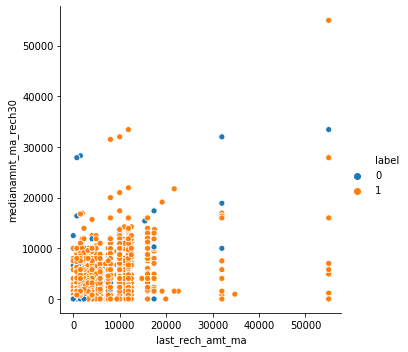

In [28]:
sns.relplot(x="last_rech_amt_ma", y="medianamnt_ma_rech30", hue="label", data=df);

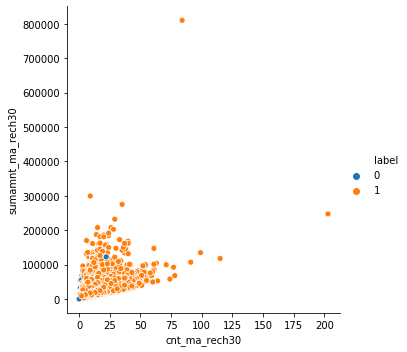

In [29]:
sns.relplot(x="cnt_ma_rech30",y="sumamnt_ma_rech30",hue="label",data=df)

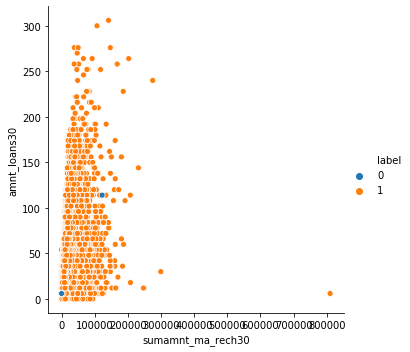

In [31]:
sns.relplot(x="sumamnt_ma_rech30",y="amnt_loans30",hue="label",data=df)

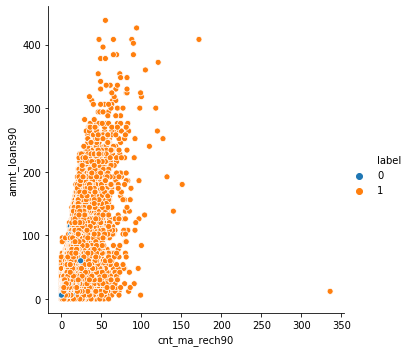

In [32]:
sns.relplot(x="cnt_ma_rech90",y="amnt_loans90",hue="label",data=df)

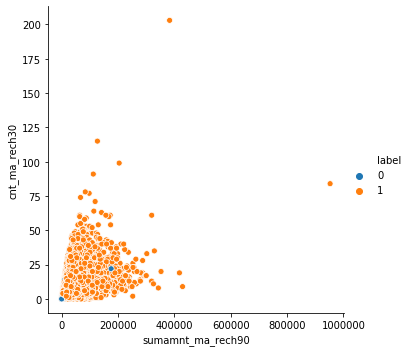

In [33]:
sns.relplot(x="sumamnt_ma_rech90",y="cnt_ma_rech30",hue="label",data=df)

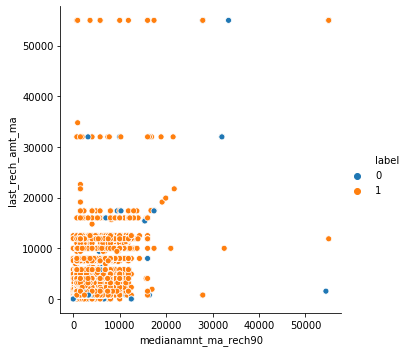

In [34]:
sns.relplot(x="medianamnt_ma_rech90",y="last_rech_amt_ma",hue="label",data=df)

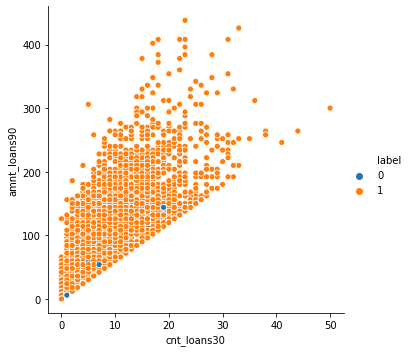

In [35]:
sns.relplot(x="cnt_loans30",y="amnt_loans90",hue="label",data=df)

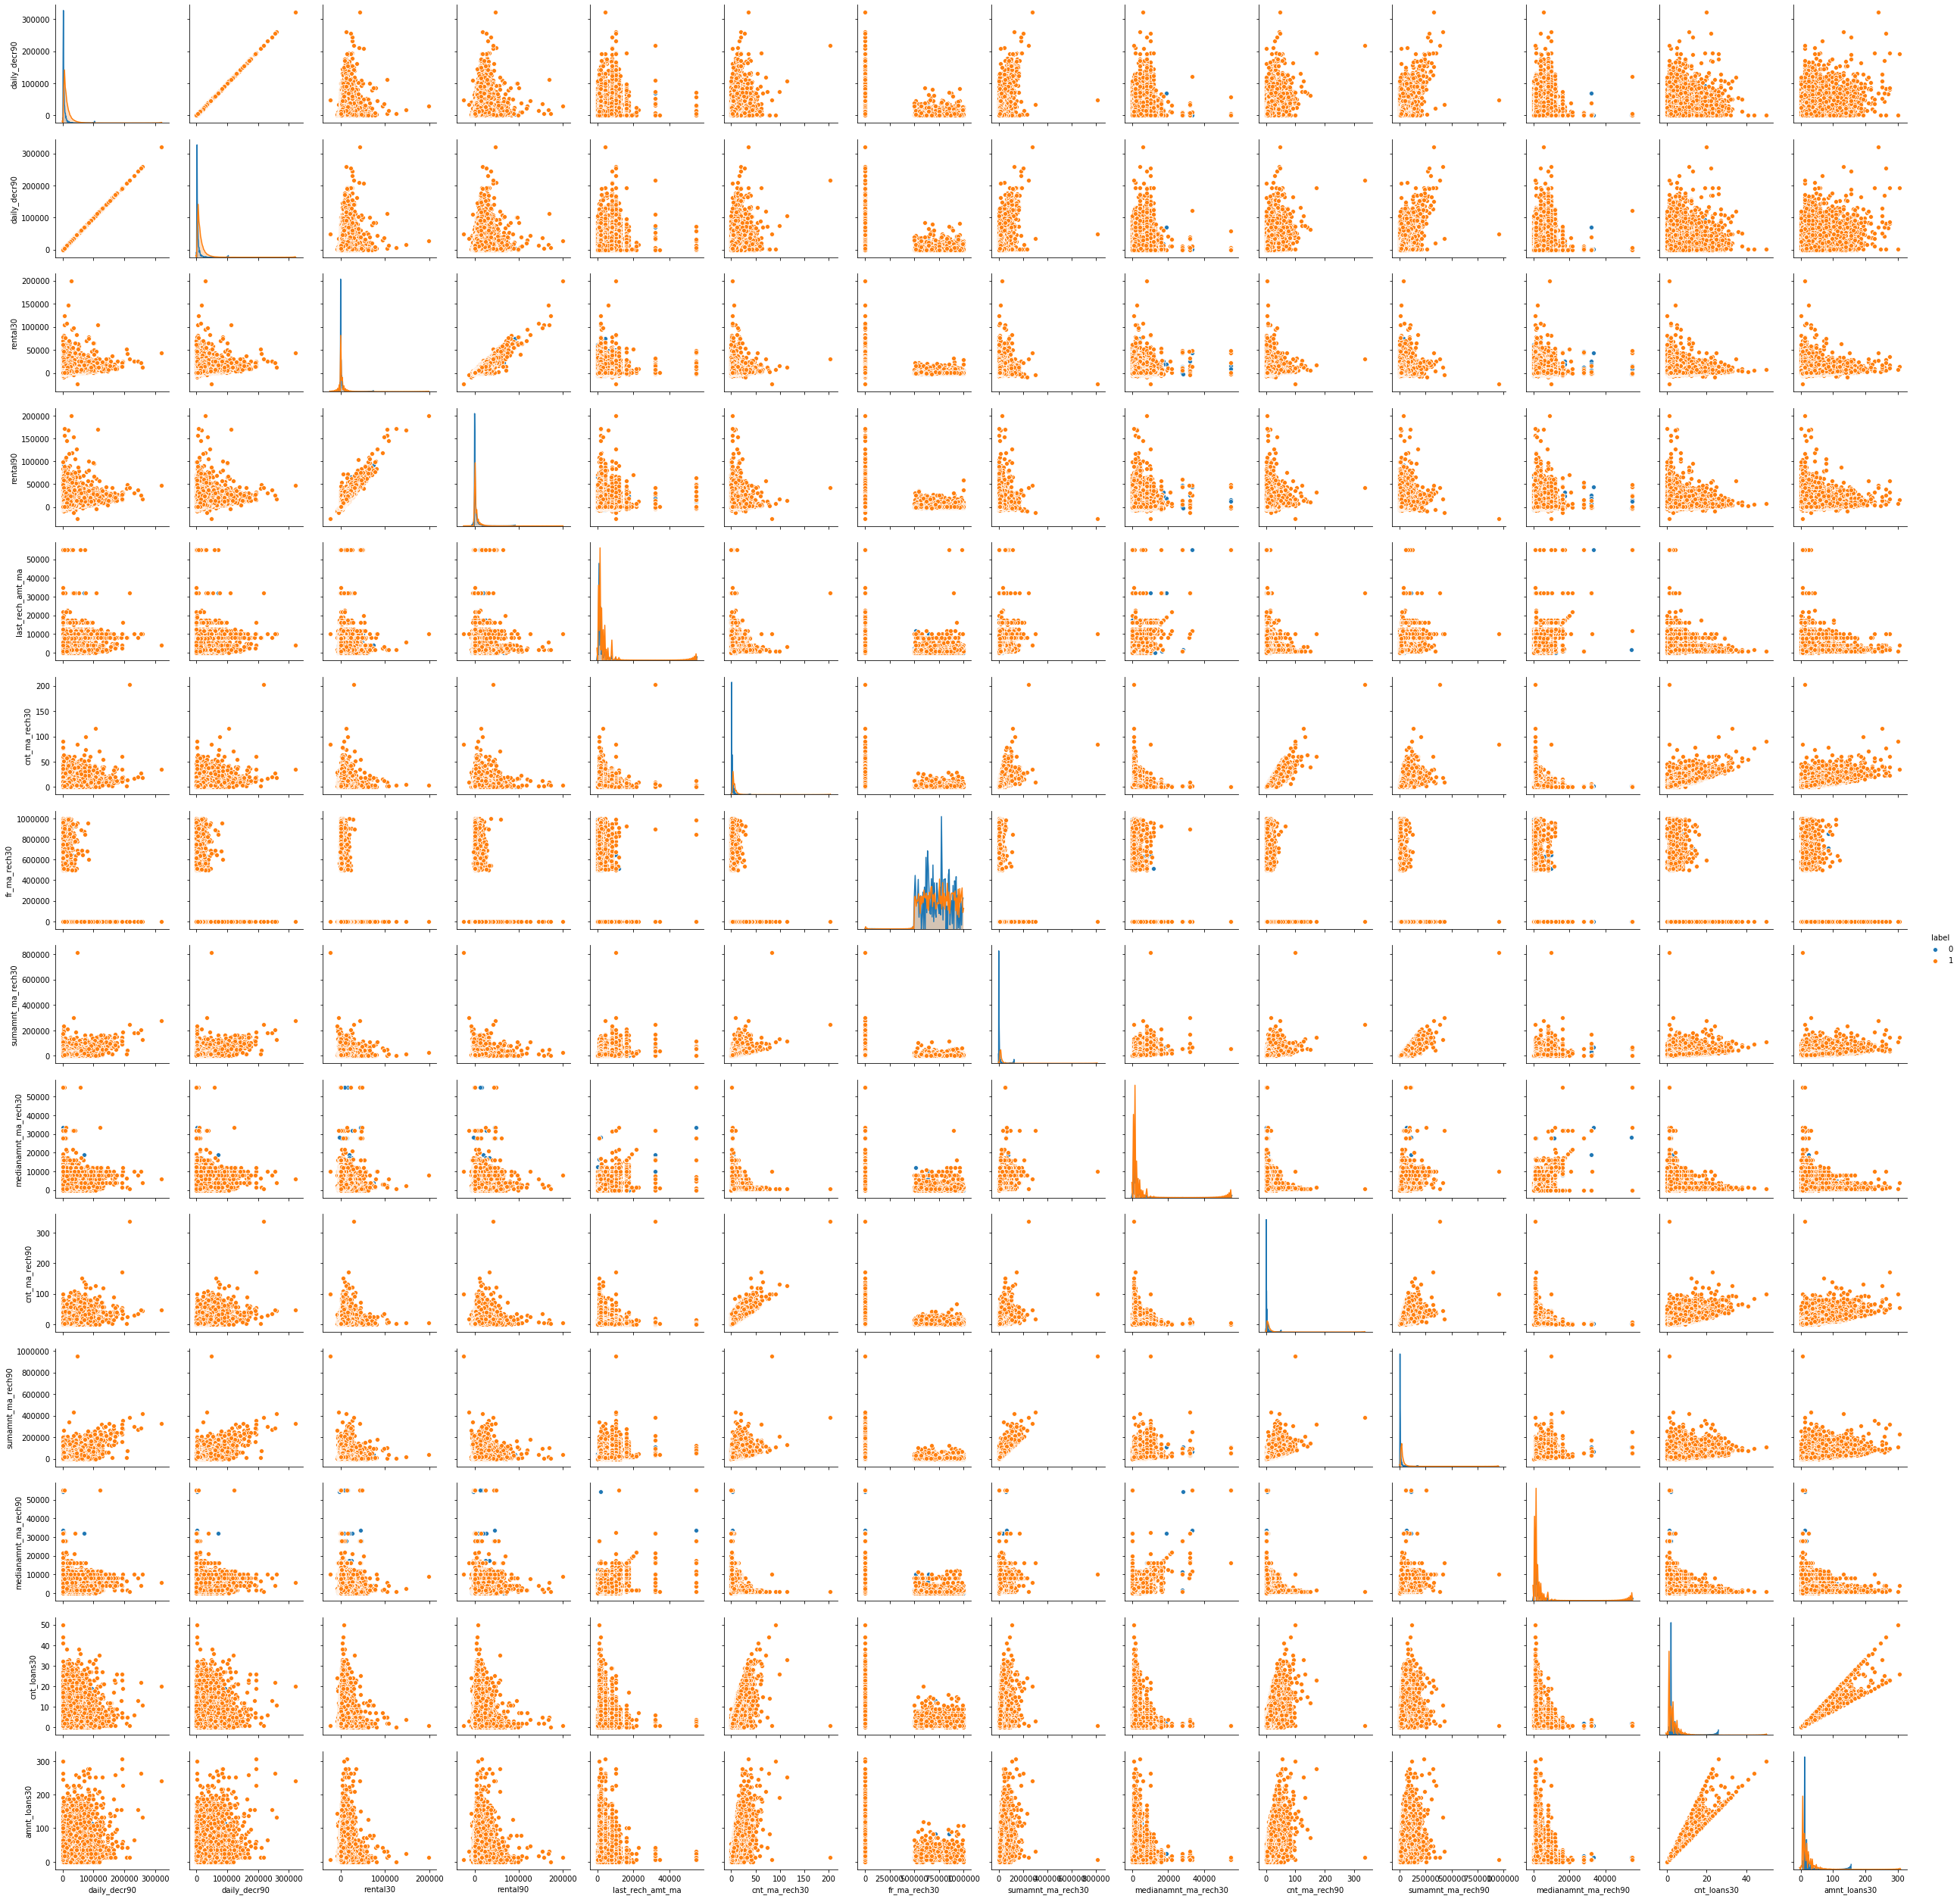

In [36]:
sns.pairplot(df,hue="label",vars=['daily_decr90','daily_decr90','rental30','rental90','last_rech_amt_ma','cnt_ma_rech30','fr_ma_rech30','sumamnt_ma_rech30','medianamnt_ma_rech30','cnt_ma_rech90','sumamnt_ma_rech90','medianamnt_ma_rech90','cnt_loans30','amnt_loans30'])

# Treating Outliers

In [37]:
from scipy.stats import zscore
z=np.abs(zscore(df))
z

array([[2.64789583, 0.10357685, 0.25229941, ..., 0.22959366, 2.9046997 ,
        2.39409346],
       [0.37765836, 0.09776412, 0.73103667, ..., 0.22959366, 0.38562959,
        0.41923266],
       [0.37765836, 0.10010243, 0.43201111, ..., 0.22959366, 0.38562959,
        0.41923266],
       ...,
       [0.37765836, 0.09378769, 0.70079045, ..., 0.22959366, 0.06820893,
        0.04735622],
       [0.37765836, 0.08428915, 0.77075515, ..., 0.22959366, 0.38562959,
        0.59938541],
       [0.37765836, 0.08628398, 0.09674426, ..., 0.22959366, 0.38562959,
        0.41923266]])

In [38]:
threshold=3
print(np.where(z>3))

(array([    21,     22,     22, ..., 209586, 209587, 209587], dtype=int64), array([15, 15, 32, ..., 28, 26, 30], dtype=int64))


In [39]:
df1=df[((z<3).all(axis=1))] #Removing the outliers
df1

,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,...,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90
0,0,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,1539,2,...,2,12,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000
1,1,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,5787,1,...,1,12,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000
2,1,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,1539,1,...,1,6,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000
3,1,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,947,0,...,2,12,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000
4,1,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,2309,7,...,7,42,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209588,1,404.0,151.872333,151.872333,1089.19,1089.19,1.0,0.0,4048,3,...,2,12,6.0,0.0,2.0,12,6,0.0,1.000000,1.000000
209589,1,1075.0,36.936000,36.936000,1728.36,1728.36,4.0,0.0,773,4,...,3,18,6.0,0.0,3.0,18,6,0.0,1.000000,1.000000
209590,1,1013.0,11843.111670,11904.350000,5861.83,8893.20,3.0,0.0,1539,5,...,4,42,12.0,0.0,6.0,54,12,0.0,4.000000,3.833333
209591,1,1732.0,12488.228330,12574.370000,411.83,984.58,2.0,38.0,773,5,...,2,18,12.0,0.0,3.0,24,12,0.0,0.000000,10.500000


In [40]:
df1.shape

(161465, 33)

In [41]:
df.shape

(209593, 33)

#### Observation

* After removing outliers, 48128 rows have been removed

# Feature Engineering

#### From the correlation matrix and scatter plots we saw there are some independent variables which are highly correlated with each other.
#### Hence, we will do feature engineering to remove variables which are highly correlated and avoid multicolinearilty.
#### We will use VIF and Low Variance methods to do feature engineering.

In [42]:
# Here we are setting a threeshold value of 10, any vif value more than 10 will be removed

In [43]:
#Import library for VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(X):
    vif= pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
    
    return(vif)

In [44]:
df1.iloc[:,1:]

,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,...,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90
0,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,1539,2,21.0,...,2,12,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000
1,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,5787,1,0.0,...,1,12,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000
2,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,1539,1,0.0,...,1,6,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000
3,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,947,0,0.0,...,2,12,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000
4,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,2309,7,2.0,...,7,42,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209588,404.0,151.872333,151.872333,1089.19,1089.19,1.0,0.0,4048,3,2.0,...,2,12,6.0,0.0,2.0,12,6,0.0,1.000000,1.000000
209589,1075.0,36.936000,36.936000,1728.36,1728.36,4.0,0.0,773,4,1.0,...,3,18,6.0,0.0,3.0,18,6,0.0,1.000000,1.000000
209590,1013.0,11843.111670,11904.350000,5861.83,8893.20,3.0,0.0,1539,5,8.0,...,4,42,12.0,0.0,6.0,54,12,0.0,4.000000,3.833333
209591,1732.0,12488.228330,12574.370000,411.83,984.58,2.0,38.0,773,5,4.0,...,2,18,12.0,0.0,3.0,24,12,0.0,0.000000,10.500000


In [45]:
X = df1.iloc[:,1:]

In [46]:
calc_vif(X)

,variables,VIF
0,aon,2.693498
1,daily_decr30,45.455707
2,daily_decr90,49.372942
3,rental30,18.825759
4,rental90,20.282126
5,last_rech_date_ma,1.905527
6,last_rech_date_da,1.982595
7,last_rech_amt_ma,7.242094
8,cnt_ma_rech30,31.800114
9,fr_ma_rech30,1.986336


In [47]:
#Vif value of daily_decr30 is 38, so will remove it and continue this step till all values are =<10.

In [48]:
df1.drop(['daily_decr30'],axis=1,inplace=True)

In [49]:
X = df1.iloc[:,1:]

In [50]:
calc_vif(X)

,variables,VIF
0,aon,2.693448
1,daily_decr90,4.361074
2,rental30,17.478269
3,rental90,19.056162
4,last_rech_date_ma,1.903644
5,last_rech_date_da,1.982588
6,last_rech_amt_ma,7.242036
7,cnt_ma_rech30,31.768431
8,fr_ma_rech30,1.985819
9,sumamnt_ma_rech30,23.109336


In [51]:
df1.drop(['amnt_loans30'],axis=1,inplace=True)

In [52]:
X = df1.iloc[:,1:]
calc_vif(X)

,variables,VIF
0,aon,2.691455
1,daily_decr90,4.358491
2,rental30,17.427868
3,rental90,19.010702
4,last_rech_date_ma,1.902867
5,last_rech_date_da,1.982571
6,last_rech_amt_ma,7.241916
7,cnt_ma_rech30,31.735751
8,fr_ma_rech30,1.985456
9,sumamnt_ma_rech30,23.046347


In [53]:
df1.drop(['cnt_ma_rech30'],axis=1,inplace=True)

In [54]:
X = df1.iloc[:,1:]
calc_vif(X)

,variables,VIF
0,aon,2.691364
1,daily_decr90,4.358169
2,rental30,17.385865
3,rental90,18.961504
4,last_rech_date_ma,1.864601
5,last_rech_date_da,1.982326
6,last_rech_amt_ma,7.212789
7,fr_ma_rech30,1.979109
8,sumamnt_ma_rech30,12.665046
9,medianamnt_ma_rech30,11.184623


In [55]:
df1.drop(['rental30'],axis=1,inplace=True)

In [56]:
X = df1.iloc[:,1:]
calc_vif(X)

,variables,VIF
0,aon,2.691213
1,daily_decr90,4.343798
2,rental90,2.112510
3,last_rech_date_ma,1.864428
4,last_rech_date_da,1.982066
5,last_rech_amt_ma,7.212501
6,fr_ma_rech30,1.978607
7,sumamnt_ma_rech30,12.437562
8,medianamnt_ma_rech30,11.181467
9,medianmarechprebal30,2.483465


In [57]:
df1.drop(['sumamnt_ma_rech90'],axis=1,inplace=True)

In [58]:
X = df1.iloc[:,1:]
calc_vif(X)

,variables,VIF
0,aon,2.691027
1,daily_decr90,3.704339
2,rental90,2.112489
3,last_rech_date_ma,1.864419
4,last_rech_date_da,1.982054
5,last_rech_amt_ma,7.210531
6,fr_ma_rech30,1.977835
7,sumamnt_ma_rech30,6.939042
8,medianamnt_ma_rech30,11.026532
9,medianmarechprebal30,2.481305


In [59]:
df1.drop(['amnt_loans90'],axis=1,inplace=True)

In [60]:
X = df1.iloc[:,1:]
calc_vif(X)

,variables,VIF
0,aon,2.593930
1,daily_decr90,3.302317
2,rental90,2.112456
3,last_rech_date_ma,1.834294
4,last_rech_date_da,1.981894
5,last_rech_amt_ma,7.210360
6,fr_ma_rech30,1.969693
7,sumamnt_ma_rech30,6.872040
8,medianamnt_ma_rech30,10.980113
9,medianmarechprebal30,2.480950


* Now we see all values are =<10

In [61]:
df1.shape

(161465, 27)

In [62]:
df1.isnull().sum()

label                   0
aon                     0
daily_decr90            0
rental90                0
last_rech_date_ma       0
last_rech_date_da       0
last_rech_amt_ma        0
fr_ma_rech30            0
sumamnt_ma_rech30       0
medianamnt_ma_rech30    0
medianmarechprebal30    0
cnt_ma_rech90           0
fr_ma_rech90            0
medianamnt_ma_rech90    0
medianmarechprebal90    0
cnt_da_rech30           0
fr_da_rech30            0
cnt_da_rech90           0
fr_da_rech90            0
cnt_loans30             0
maxamnt_loans30         0
medianamnt_loans30      0
cnt_loans90             0
maxamnt_loans90         0
medianamnt_loans90      0
payback30               0
payback90               0
dtype: int64

In [63]:
# 6 columns have been removed.

# 4. Pre-processing

In [64]:
x=df1.iloc[:,1:]

In [65]:
y=df1[['label']]

In [66]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()

x = scale.fit_transform(x)

In [67]:
collist=df1.columns.values
ncol=2
nrows=17

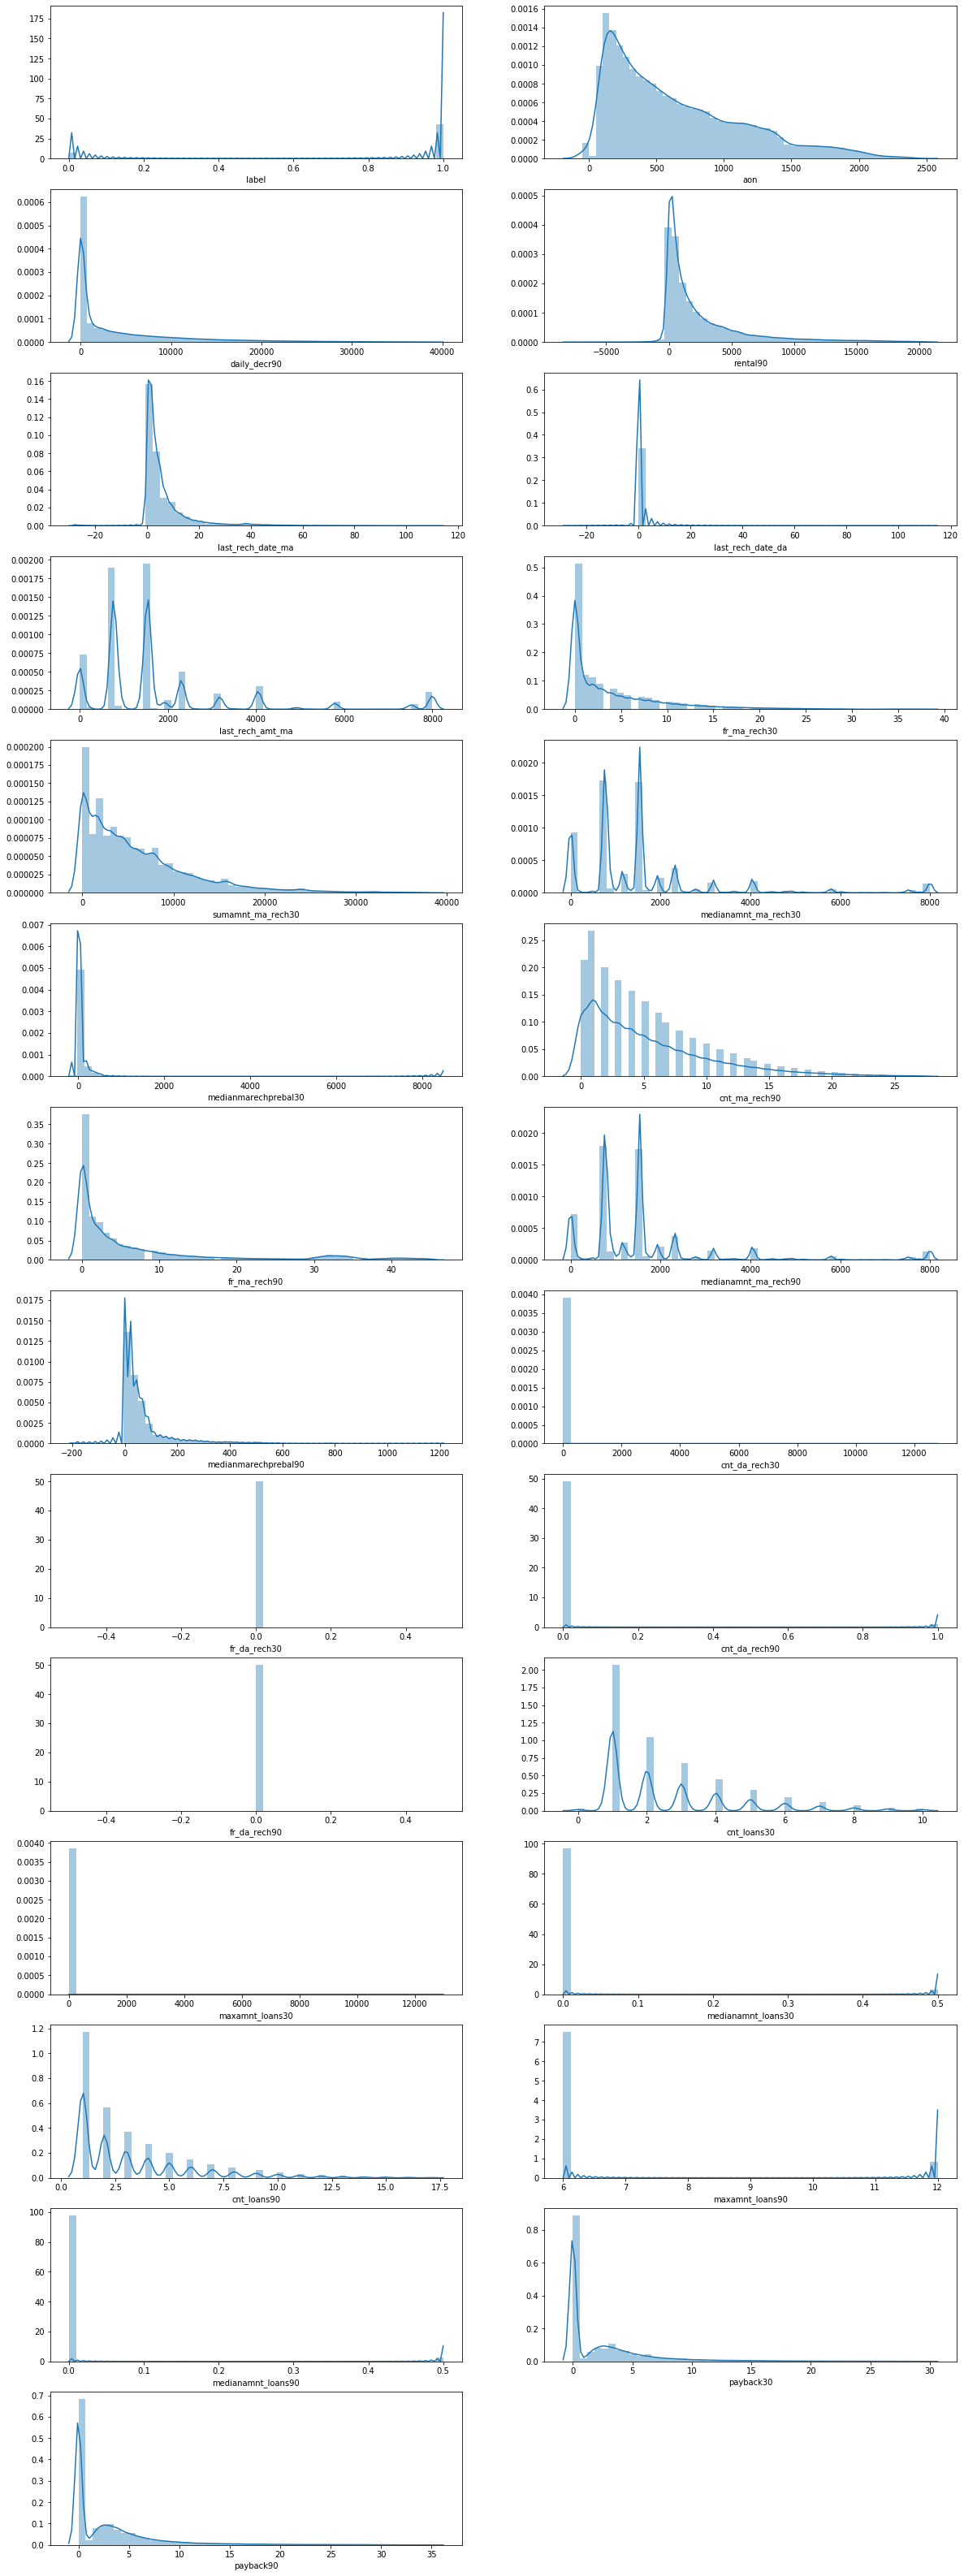

In [68]:
plt.figure(figsize=(20,70))
for i in range (0,len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.distplot(df1[collist[i]])

In [69]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.33,random_state=42)

# 5. Model Building

### Logistic Regression

In [70]:
from sklearn.metrics import f1_score
lg = LogisticRegression()
lg.fit(x_train,y_train)
lg.score(x_train,y_train)

0.8630813174217284

In [71]:
pred=lg.predict(x_test)
print(pred)
print('F1_score:',f1_score(y_test,pred))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

[1 1 1 ... 1 1 1]
F1_score: 0.9266232444534909
[[  549  6786]
 [  424 45525]]
              precision    recall  f1-score   support

           0       0.56      0.07      0.13      7335
           1       0.87      0.99      0.93     45949

    accuracy                           0.86     53284
   macro avg       0.72      0.53      0.53     53284
weighted avg       0.83      0.86      0.82     53284



In [72]:
from sklearn.model_selection import cross_val_score

In [73]:
lgscores=cross_val_score(lg,X=x_train,y=y_train,cv=5,scoring='f1')
print(lgscores)
print(lgscores.mean()*100,lgscores.std()*100)

[0.92605404 0.92501003 0.9257734  0.92551243 0.92574556]
92.56190932787085 0.034966219004728974


### GausianNB

In [74]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(x_train,y_train,)
gnb.score(x_train,y_train)

0.6703210360414491

In [75]:
predgnb = gnb.predict(x_test)
print('F1_score:',f1_score(predgnb,y_test))
print(confusion_matrix(y_test,predgnb))
print(classification_report(y_test,predgnb))

F1_score: 0.7712613784135239
[[ 6039  1296]
 [16294 29655]]
              precision    recall  f1-score   support

           0       0.27      0.82      0.41      7335
           1       0.96      0.65      0.77     45949

    accuracy                           0.67     53284
   macro avg       0.61      0.73      0.59     53284
weighted avg       0.86      0.67      0.72     53284



In [76]:
gnbscores=cross_val_score(lg,X=x_train,y=y_train,cv=5,scoring='f1')
print(gnbscores)
print(gnbscores.mean()*100,lgscores.std()*100)

[0.92605404 0.92501003 0.9257734  0.92551243 0.92574556]
92.56190932787085 0.034966219004728974


### Grid Search (SVC)

In [78]:
from sklearn.model_selection import GridSearchCV

In [ ]:
#Grid Search for Algorithm Tuning

from sklearn import svm, datasets
from sklearn.model_selection import GridSearchCV

dataset = df
parameters = {'kernel':('linear','rbf','poly'),'C':[1,10]}
svc = svm.SVC()
clf = GridSearchCV(svc, parameters)
clf.fit(x,y)
print(clf.best_score_)
print(clf.best_estimator_.kernel)
print(clf.best_params_)


### GridSearch (DecisinTree)

In [79]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
grid_param = {
    'criterion':['gini','entropy']
}

#gridk = {'kernel' :['linear','rbf','ploy']}
gd_sr = GridSearchCV(estimator=dtc,
                    param_grid=grid_param,
                    scoring='f1')
gd_sr.fit(x,y)

best_parameters = gd_sr.best_params_
print(best_parameters)
best_result = gd_sr.best_score_
print(best_result)

{'criterion': 'entropy'}
0.9179833803028027


### DecisionTree

In [86]:
from sklearn.tree import DecisionTreeClassifier
dct = DecisionTreeClassifier(criterion='entropy')
dct.fit(x_train,y_train)
dct.score(x_train,y_train)


0.9996487368391862

In [94]:
preddct = dct.predict(x_test)
preddct
print('f1_score',f1_score(preddct,y_test))
print(confusion_matrix(y_test,preddct))
print(classification_report(y_test,preddct))

accuracy_score 0.9197510645266951
[[ 3814  3521]
 [ 3829 42120]]
              precision    recall  f1-score   support

           0       0.50      0.52      0.51      7335
           1       0.92      0.92      0.92     45949

    accuracy                           0.86     53284
   macro avg       0.71      0.72      0.71     53284
weighted avg       0.86      0.86      0.86     53284



In [88]:
dctscores=cross_val_score(dct,X=x_train,y=y_train,cv=5,scoring='f1')
print(dctscores)
print(dctscores.mean()*100,dctscores.std()*100) 

[0.91604166 0.91875788 0.91472366 0.91856678 0.91910462]
91.74389195964885 0.17384627206286615


### Knn

In [85]:
from sklearn.neighbors import KNeighborsClassifier
Knn = KNeighborsClassifier(n_neighbors=4,weights='uniform',algorithm='auto')
Knn.fit(x_train,y_train)
Knn.score(x_train,y_train)

0.8994185670311792

In [96]:
predknn = Knn.predict(x_test)
predknn
print('f1_score',f1_score(predknn,y_test))
print(confusion_matrix(y_test,predknn))
print(classification_report(y_test,predknn))

f1_score 0.9101064413475254
[[ 3623  3712]
 [ 4480 41469]]
              precision    recall  f1-score   support

           0       0.45      0.49      0.47      7335
           1       0.92      0.90      0.91     45949

    accuracy                           0.85     53284
   macro avg       0.68      0.70      0.69     53284
weighted avg       0.85      0.85      0.85     53284



In [90]:
knnscores=cross_val_score(Knn,X=x_train,y=y_train,cv=5,scoring='f1')
print(knnscores)
print(knnscores.mean()*100,knnscores.std()*100)

[0.90865865 0.90691194 0.90741793 0.91014665 0.90971546]
90.85701275149177 0.12555615873657597


### Random Forest

In [91]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=500,max_features ='log2',max_depth = 8,criterion='entropy')

rf.fit(x_train,y_train)
rf.score(x_train,y_train)

0.8943437387341585

In [97]:
predrf = rf.predict(x_test)
predrf

print('predicted',predrf)
print('actual',y_test)

print(f1_score(y_test,predrf))
print(confusion_matrix(y_test,predrf))
print(classification_report(y_test,predrf))

predicted [1 1 1 ... 1 1 1]
actual         label
84716       1
125330      1
151021      1
46762       1
99037       1
...       ...
153132      1
7434        1
38831       1
196080      1
61995       1

[53284 rows x 1 columns]
0.9421874195044048
[[ 1951  5384]
 [  227 45722]]
              precision    recall  f1-score   support

           0       0.90      0.27      0.41      7335
           1       0.89      1.00      0.94     45949

    accuracy                           0.89     53284
   macro avg       0.90      0.63      0.68     53284
weighted avg       0.89      0.89      0.87     53284



In [93]:
rfscores=cross_val_score(rf,X=x_train,y=y_train,cv=5,scoring='f1')
print(rfscores)
print(rfscores.mean()*100,rfscores.std()*100)

[0.94141876 0.9410031  0.94281857 0.94293637 0.9413885 ]
94.19130621853776 0.08018280102907951


In [101]:
list1=[lg.score(x_train,y_train),f1_score(y_test,pred),lgscores.mean()*100]
list2=[gnb.score(x_train,y_train),f1_score(predgnb,y_test),gnbscores.mean()*100]
list3=[dct.score(x_train,y_train),f1_score(preddct,y_test),dctscores.mean()*100]
list4=[Knn.score(x_train,y_train),f1_score(predknn,y_test),knnscores.mean()*100]
list5=[rf.score(x_train,y_train),f1_score(y_test,predrf),rfscores.mean()*100]

In [102]:
model_performance=pd.DataFrame(list(zip(list1,list2,list3,list4,list5)),index=['train_score','test_score','cross_val_score'],columns=['Lg','gnb','dct','Knn','rf'])

In [103]:
model_performance

,Lg,gnb,dct,Knn,rf
train_score,0.863081,0.670321,0.999649,0.899419,0.894344
test_score,0.926623,0.771261,0.919751,0.910106,0.942187
cross_val_score,92.561909,92.561909,91.743892,90.857013,94.191306


# 6. Conclusion

From the above model we see RandomForest is the best model